In [1]:
# If you are on a machine with intel cpu, you can use the following code to enable the intel mkl library for better performance
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Support Vector Machine

In [2]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, linear_model
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

### Linear SVM

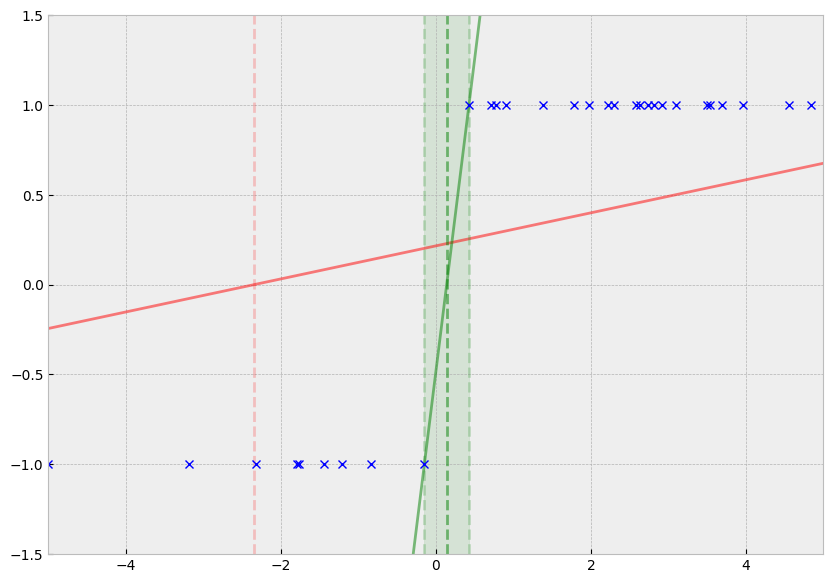

In [3]:
X = np.random.normal(5, 5, size=(50,1))
y0 = X[:,0]>0
y = y0.ravel()*2-1

# linear regression
regr = linear_model.LinearRegression().fit(X, y)
test_X=np.linspace(-10,10,100).reshape(-1,1)
plt.plot(test_X, regr.predict(test_X), alpha=0.5, c='r')
plt.plot([-regr.intercept_/regr.coef_[0]]*2, [-1.5,1.5], 'r--', alpha=0.2)


# linear svm
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X,y)
plt.ylim(-1.5, 1.5)
plt.xlim(-5, 5)

# svm 的判斷分割點
x0 = -clf.intercept_[0]/clf.coef_[0,0]
x1 = (1-clf.intercept_[0])/clf.coef_[0,0]
x2 = (-1-clf.intercept_[0])/clf.coef_[0,0]
# or 
#assert (clf.n_support_ == [1,1]).all()
#x1, x2 = clf.support_vectors_.ravel()
plt.plot(test_X, clf.coef_[0]*test_X+clf.intercept_, 'g', alpha=0.5);
plt.plot([x0]*2, [-1.5,1.5], 'g--', alpha=0.5)
for x in [x1, x2]:
    plt.plot([x]*2, [-1.5,1.5], 'g--', alpha=0.2);
plt.fill_betweenx([-1.5,1.5], [x1]*2, [x2]*2,alpha=0.1, zorder=-1, color="g")

plt.plot(X, y, 'bx');

SVM experiment

Use Iris dataset https://en.wikipedia.org/wiki/Iris_flower_data_set

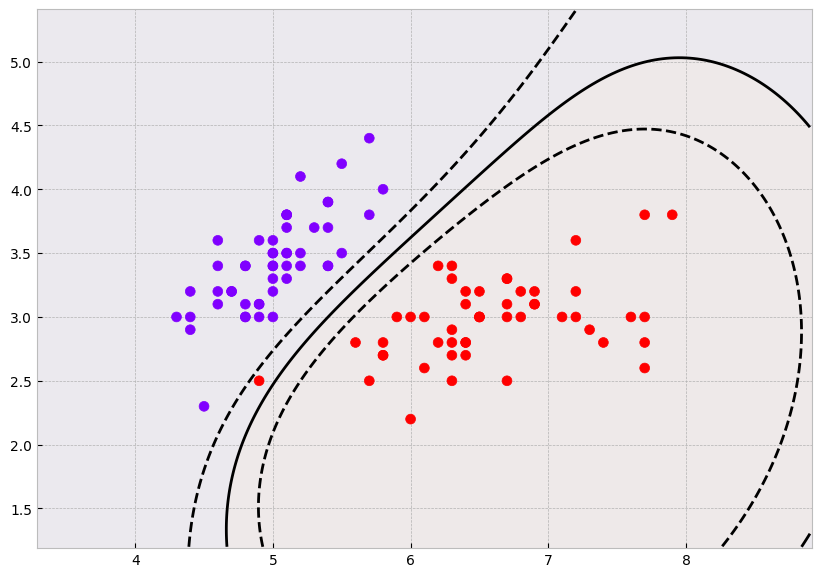

In [4]:
# Iris dataset
X, y = datasets.load_iris(return_X_y=True)
# use only y=0,2 (for doing binary classification) and first two features of X (easier for visualization)
X = X[y!=1, :2]
y = y[y!=1]
clf=svm.SVC(kernel='rbf', C=10)
clf.fit(X, y)

# boundary
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# mesh grid
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)

# compute  prediction on grid points
Z = clf.decision_function(grid.reshape(2, -1).T)
Z  = Z.reshape(grid.shape[1:])

# plot color and boundary
plt.pcolormesh(grid[0], grid[1], Z > 0, cmap=plt.cm.rainbow, alpha=0.02)
plt.contour(grid[0], grid[1], Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

# lable the sample points
plt.scatter(X[:,0], X[:, 1],  c=y, cmap=plt.cm.rainbow, zorder=10, s=50);


## Q
* Explore different setting of the svm 
* Can the result be visualized differently?
* see http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py

## MNIST

In [14]:
# Download the MNIST dataset using '01-From NumPy to Mnist.ipynb'
# if you haven't done so already
def read_dataset(prefix):
    images = np.fromfile(prefix + '-images.idx3-ubyte', dtype='uint8', offset=16).reshape(-1, 28*28)/255
    labels = np.fromfile(prefix + '-labels.idx1-ubyte', dtype='uint8', offset=8)
    return images, labels
train_set = read_dataset('train')
test_set = read_dataset('t10k')
train_X, train_y = train_set
test_X, test_y = test_set

# Use PCA to reduce the dimensionality of the data to 60
# This will make the SVM run faster without significantly affecting the accuracy
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
train_X = pca.fit_transform(train_set[0])
test_X = pca.transform(test_set[0])

# Another way to speed up the SVM is to use a smaller training set
#idx = np.random.choice(np.arange(train_X.shape[0]), 30000, replace=False)
#train_X = train_X[idx]
#train_y = train_y[idx]

In [15]:
clf = svm.SVC(decision_function_shape='ovr', verbose=True)

In [17]:
from sklearn import metrics
from rich import print
clf.fit(train_X, train_y)
pred_y = clf.predict(train_X)
print(np.mean(pred_y == train_y))
print("accuracy", metrics.accuracy_score(train_y, pred_y))
print(metrics.classification_report(train_y, pred_y))

pred_y = clf.predict(test_X)
print(np.mean(pred_y == test_y))
print("accuracy", metrics.accuracy_score(test_y, pred_y))
print(metrics.classification_report(test_y, pred_y))


0.9919666666666667

accuracy 0.9919666666666667

precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       0.99      1.00      0.99      6742
           2       0.99      0.99      0.99      5958
           3       0.99      0.99      0.99      6131
           4       0.99      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       0.99      1.00      1.00      5918
           7       0.99      0.99      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.99      0.98      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

0.9839

accuracy 0.9839

precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

In [20]:
import pandas as pd
from IPython.display import display
confusion_matrix = metrics.confusion_matrix(test_y, pred_y)
confusion_df = pd.DataFrame(confusion_matrix, 
                            index=range(10), 
                            columns=range(10))
confusion_df.columns = pd.MultiIndex.from_product([['Predicted'], confusion_df.columns])
confusion_df.index = pd.MultiIndex.from_product([['Actual'], confusion_df.index])
display(confusion_df)


Predicted                                                
                 0     1     2    3    4    5    6     7    8    9
Actual 0       973     0     2    0    0    2    0     1    2    0
       1         0  1130     2    1    0    1    0     0    1    0
       2         5     0  1011    0    1    0    2     9    4    0
       3         0     0     1  996    0    3    0     6    3    1
       4         0     0     2    0  966    0    3     0    1   10
       5         2     0     0    7    1  877    2     0    2    1
       6         5     2     0    0    2    3  945     0    1    0
       7         0     5     9    2    2    0    0  1003    0    7
       8         2     0     1    3    3    1    1     2  958    3
       9         2     3     1    6    8    2    1     4    2  980

## Q
* use different PCA setting?
* without using PCA?
* use random features?
* combine PCA with random features?